$$\large \textbf{This Supervised Learning Model is to predict the House Prices in Boston}$$

$$\normalsize \underline{\textbf{The Kaggle Get-Started Competition}}$$

$$\small \textbf{The CopyRight @ Phuong V. Nguyen}$$

This Machine Learning program was written by Phuong V. Nguyen, based on the $\textbf{Anacoda 1.9.7}$ and $\textbf{Python 3.7}$.

$$\underline{\textbf{Main Contents}}$$

# 1. Preparing the Project

## 1.1. Loading Libraries

In [1]:
# 1. Algorithms for handling raw data
import os
import numpy as np
import pandas as pd
from scipy import stats
from pandas import set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from feature_selector import FeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# 2. Trained Machine Learning for the Classification

In [3]:
## 2.1. Linear Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [4]:
## 2.2. Non-linear Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVR

In [5]:
## 2.3. Advanced  Algorithms (Ensemble Algorithms)
from sklearn.pipeline import Pipeline
### 2.3.1. Boosting Methods
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
### 2.3.2. Bagging Methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
## 2.3.3. Combining several Classification Algorithms
from sklearn.ensemble import VotingClassifier


In [6]:
# 3. Algorithms for the model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error

In [6]:
# 4. Defining some varibales for printing the result
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'

## 1.2. Loading data

In [ ]:
os.getcwd()


In [7]:
os.chdir("C:/Users/Thilo  Kroeger/Dropbox/Machine Learning/Kaggle Competion/Housing Price Prediction/house-prices-advanced-regression-techniques")
os.getcwd()

'C:\\Users\\Thilo  Kroeger\\Dropbox\\Machine Learning\\Kaggle Competion\\Housing Price Prediction\\house-prices-advanced-regression-techniques'

In [116]:
used_data=pd.read_csv('train.csv')
used_data.shape

(1460, 81)

In [9]:
X_predict_used_data=pd.read_csv('test.csv')
X_predict_used_data.shape

(1459, 80)

# 2. Exploring, Understanding and Summarizing data

In [ ]:
used_data.iloc[:,0:10].head(10)

In [ ]:
used_data.columns

In [ ]:
used_data1=used_data.iloc[:,1:81]
used_data1.iloc[:,0:11].head(5)

In [ ]:
print(np.unique(used_data1['LandContour']))

$$\Large \underline{\textbf{Noting that:}}$$

$$\text{The Python function of $\bf{FeatureSelector}$ is $\textbf{hugely beneficial}$ for handling raw data.}$$

In [117]:
fs=FeatureSelector(data=used_data.iloc[:,1:80],labels=used_data.iloc[:,80])

### 2.1. Missing data

In [118]:
fs.identify_missing(missing_threshold=0.01)

16 features with greater than 0.01 missing values.



In [46]:
fs.missing_stats
fs.missing_stats.to_excel("missing_data.xls") 

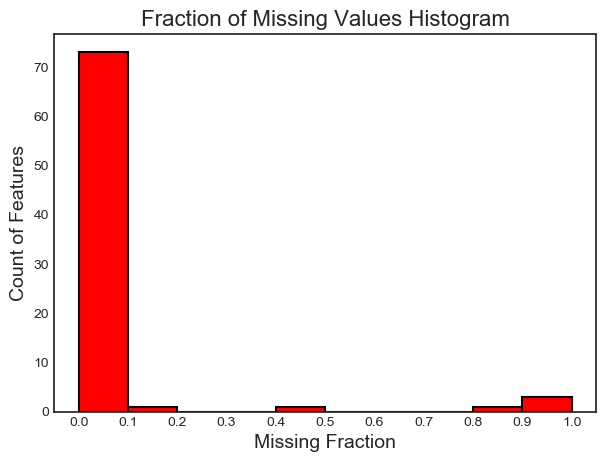

In [119]:
fs.plot_missing()

### Another way to detect and compute the missing data

In [155]:
amount_missing_data=used_data.iloc[:,1:81].isnull().sum().sort_values(ascending=False)

In [156]:
percent_miss_data=(used_data.iloc[:,1:81].isnull().sum()/used_data.iloc[:,1:81].isnull().count()).sort_values(ascending=False)

In [160]:
missing_data=pd.concat([amount_missing_data, percent_miss_data],axis=1,keys=['Amount','Percent'])
missing_data.head(5)
#missing_data.to_excel("missing_data_all.xls") 

,Amount,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
SalePrice,0,0.000000


###### Plotting them

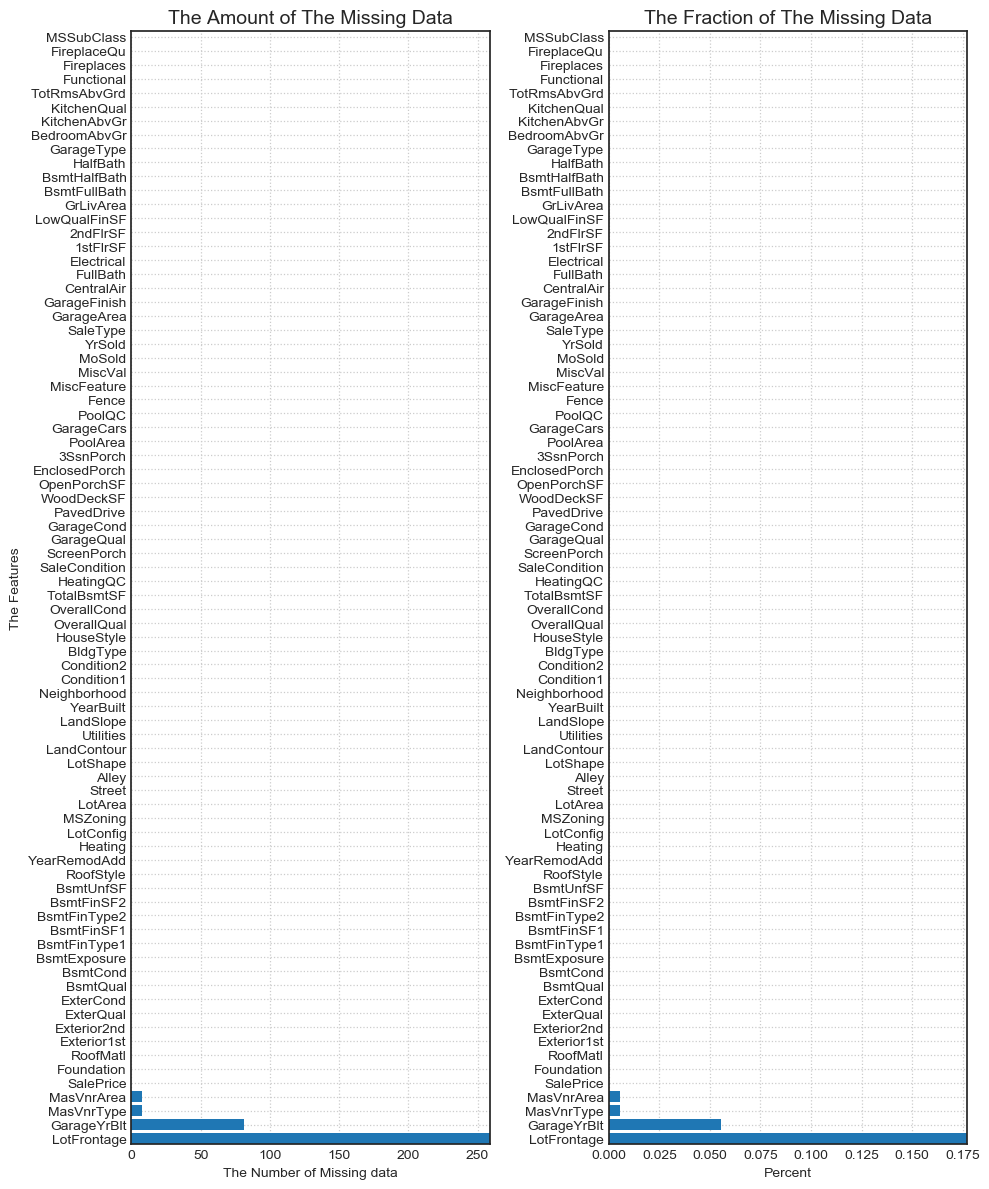

In [161]:
fig=plt.figure(figsize=(10,12))
#fig.suptitle('The Missing Data', fontsize=16)
fig.add_subplot(1,2,1)
plt.barh(missing_data.index,missing_data.Amount.sort_values(ascending=False))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('The Amount of The Missing Data',fontsize=14)
plt.ylabel('The Features',fontsize=10)
plt.xlabel('The Number of Missing data', fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=0.9)
fig.add_subplot(1,2,2)
plt.barh(missing_data.index,missing_data.Percent.sort_values(ascending=False))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('The Fraction of The Missing Data',fontsize=14)
#plt.ylabel('The Features',fontsize=10)
plt.xlabel('Percent', fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=0.9)
plt.tight_layout()

plt.savefig("Missing_data.pdf")

#### Ploting Histogram

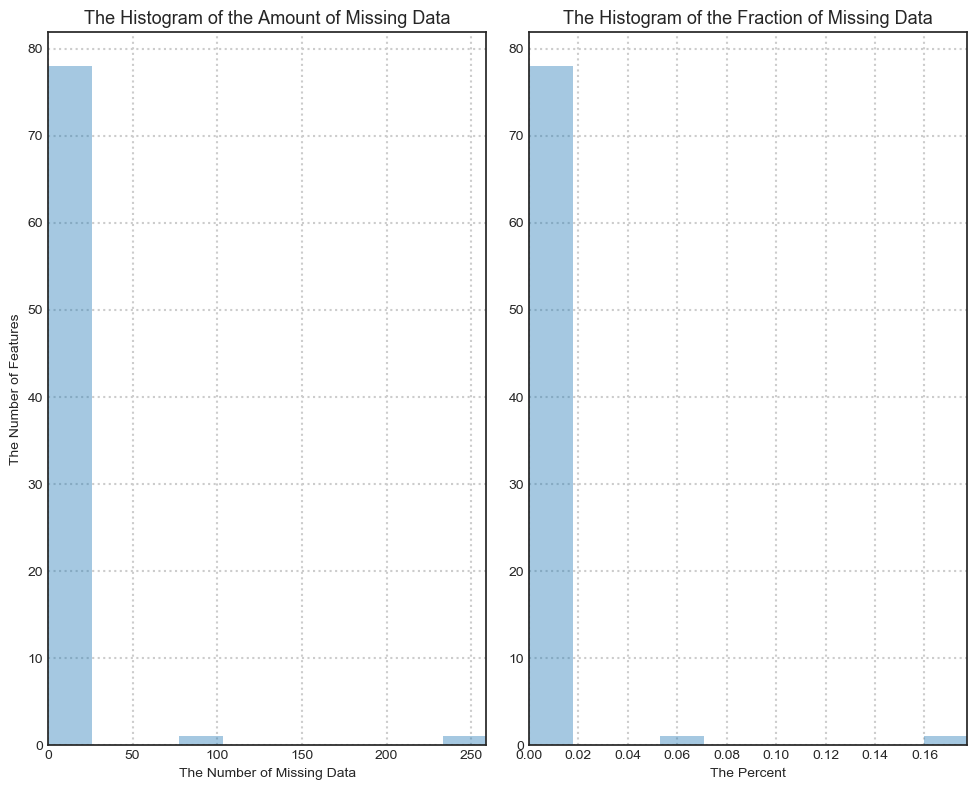

In [162]:
fig=plt.figure(figsize=(10,8))
fig.add_subplot(1,2,1)
sns.distplot(missing_data.Amount,bins=10,hist=True, kde=False)
plt.title('The Histogram of the Amount of Missing Data',fontsize=13)
plt.xlabel('The Number of Missing Data', fontsize=10)
plt.ylabel('The Number of Features',fontsize=10)
plt.grid(linestyle=':', linewidth=1.5)
plt.autoscale(enable=True,axis='x',tight=True)
fig.add_subplot(1,2,2)
sns.distplot(missing_data.Percent,bins=10,hist=True, kde=False)
plt.title('The Histogram of the Fraction of Missing Data',fontsize=13)
plt.xlabel('The Percent', fontsize=10)
#plt.ylabel('The Number of Features',fontsize=10)
plt.grid(linestyle=':', linewidth=1.5)
plt.autoscale(enable=True,axis='x',tight=True)
plt.tight_layout()
plt.savefig("Missing_data_hostogram.pdf")

In [120]:
#np.unique(used_data['PoolQC'])
used_data['PoolQC'].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: PoolQC, dtype: object

#### Noting that

NaN does not mean no data. It imlies no pool.

In [121]:
used_data[['PoolQC']]=used_data[['PoolQC']].fillna('NoPool')


In [122]:
used_data['PoolQC'].unique()

array(['NoPool', 'Ex', 'Fa', 'Gd'], dtype=object)

In [123]:
#np.unique(used_data['PoolQC'])
used_data['MiscFeature'].head(10)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5    Shed
6     NaN
7    Shed
8     NaN
9     NaN
Name: MiscFeature, dtype: object

#### Noting that

We should not delete this feature since there is a feature of its value in terms of the US Dollar, $MiscVal$, which is full data avaiable.

In [124]:
used_data[['MiscFeature']]=used_data[['MiscFeature']].fillna('Nothing')

In [125]:
used_data['MiscFeature'].unique()

array(['Nothing', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [126]:
#np.unique(used_data['Alley'])
used_data['Alley'].head(5)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Alley, dtype: object

##### Noting that:
NaN does not mean no data. It implies no Alley assess.

In [127]:
used_data[['Alley']]=used_data[['Alley']].fillna('NoAlley')
used_data.Alley.unique()

array(['NoAlley', 'Grvl', 'Pave'], dtype=object)

In [128]:
used_data['Fence'].head(5)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Fence, dtype: object

##### Noting that:
NaN does not mean no data. It implies no Fence.

In [129]:
used_data[['Fence']]=used_data[['Fence']].fillna('NoFence')
used_data.Fence.unique()

array(['NoFence', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [130]:
#np.unique(used_data['FireplaceQu'])
used_data['FireplaceQu'].head(10)

0    NaN
1     TA
2     TA
3     Gd
4     TA
5    NaN
6     Gd
7     TA
8     TA
9     TA
Name: FireplaceQu, dtype: object

#### Noting that
NaN does not mean no data. It implies no Fireplace.

In [131]:
used_data[['FireplaceQu']]=used_data[['FireplaceQu']].fillna('NoFirepl')
used_data.FireplaceQu.unique()

array(['NoFirepl', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [132]:
#np.unique(used_data['FireplaceQu'])
used_data['LotFrontage'].head(8)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
Name: LotFrontage, dtype: float64

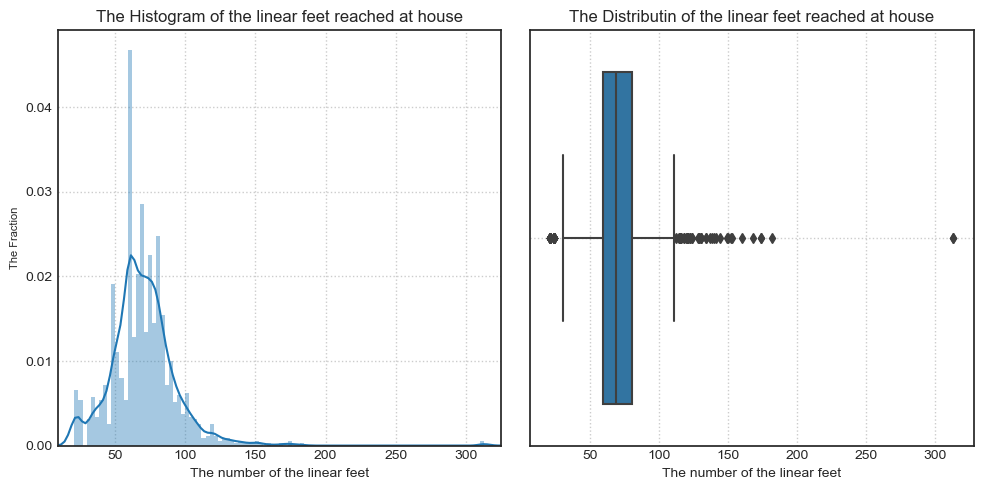

In [177]:
fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
sns.distplot(used_data.LotFrontage,bins=100)
plt.title('The Histogram of the linear feet reached at house',fontsize=12)
plt.xlabel('The number of the linear feet',fontsize=10)
plt.ylabel('The Fraction',fontsize=8)
plt.grid(which='major',linestyle=':',linewidth=1)
plt.autoscale(enable=True,axis='x',tight=True)
fig.add_subplot(1,2,2)
sns.boxplot(used_data.LotFrontage)
plt.title('The Distributin of the linear feet reached at house',fontsize=12)
plt.xlabel('The number of the linear feet',fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=1)
plt.tight_layout()

In [134]:
#np.unique(used_data['GarageType'])
used_data['GarageType'].head(5)

0    Attchd
1    Attchd
2    Attchd
3    Detchd
4    Attchd
Name: GarageType, dtype: object

#### Noting that
NaN does not mean no data. It implies No Garage

In [135]:
used_data[['GarageType']]=used_data[['GarageType']].fillna('NoGarage')
used_data.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NoGarage', 'Basment',
       '2Types'], dtype=object)

In [136]:
used_data['GarageType'].head(5)

0    Attchd
1    Attchd
2    Attchd
3    Detchd
4    Attchd
Name: GarageType, dtype: object

In [137]:
used_data.GarageCond.head()

0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageCond, dtype: object

In [138]:
used_data[['GarageCond']]=used_data[['GarageCond']].fillna('NoGarage')
used_data.GarageCond.unique()

array(['TA', 'Fa', 'NoGarage', 'Gd', 'Po', 'Ex'], dtype=object)

In [139]:
used_data.GarageFinish.head()
used_data[['GarageFinish']]=used_data[['GarageFinish']].fillna('NoGarage')
used_data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', 'NoGarage'], dtype=object)

In [140]:
used_data.GarageQual.head()
used_data[['GarageQual']]=used_data[['GarageQual']].fillna('NoGarage')
used_data.GarageQual.unique()

array(['TA', 'Fa', 'Gd', 'NoGarage', 'Ex', 'Po'], dtype=object)

In [141]:
used_data.GarageYrBlt.head()
#used_data[['GarageYrBlt']]=used_data[['GarageYrBlt']].fillna('?')
#used_data.GarageYrBlt.unique()

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64

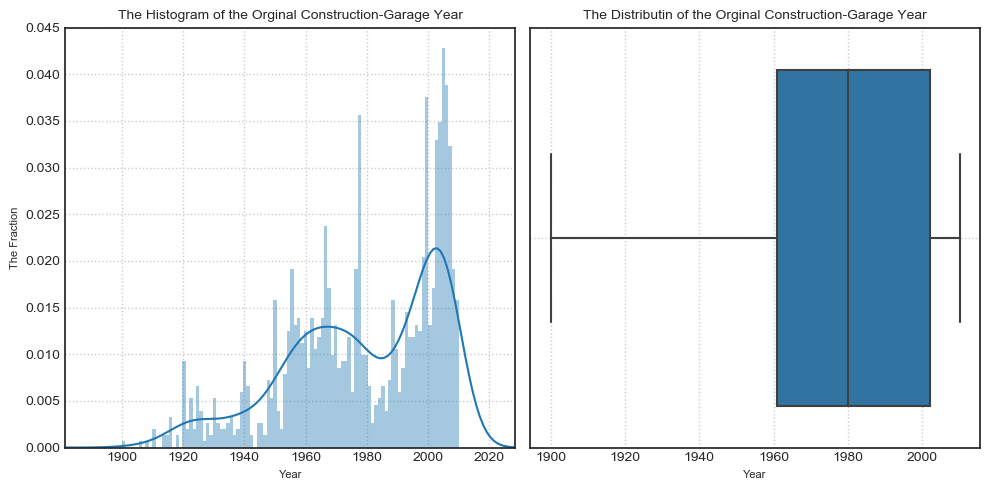

In [142]:
fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
sns.distplot(used_data.GarageYrBlt,bins=100)
plt.title('The Histogram of the Orginal Construction-Garage Year',fontsize=10)
plt.xlabel('Year',fontsize=8)
plt.ylabel('The Fraction',fontsize=8)
plt.grid(which='major',linestyle=':',linewidth=1)
plt.autoscale(enable=True,axis='x',tight=True)
fig.add_subplot(1,2,2)
sns.boxplot(used_data.GarageYrBlt)
plt.title('The Distributin of the Orginal Construction-Garage Year',fontsize=10)
plt.xlabel('Year',fontsize=8)
plt.grid(which='major',linestyle=':',linewidth=1)
plt.tight_layout()

In [143]:
used_data.BsmtFinType2.head()
used_data[['BsmtFinType2']]=used_data[['BsmtFinType2']].fillna('NoBase')
used_data.BsmtFinType2.unique()

array(['Unf', 'BLQ', 'NoBase', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [144]:
used_data.BsmtExposure.head()
used_data[['BsmtExposure']]=used_data[['BsmtExposure']].fillna('NoBase')
used_data.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', 'NoBase'], dtype=object)

In [145]:
used_data.BsmtQual.head()
used_data[['BsmtQual']]=used_data[['BsmtQual']].fillna('NoBase')
used_data.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'NoBase', 'Fa'], dtype=object)

In [146]:
used_data.BsmtCond.head()
used_data[['BsmtCond']]=used_data[['BsmtCond']].fillna('NoBase')
used_data.BsmtCond.unique()

array(['TA', 'Gd', 'NoBase', 'Fa', 'Po'], dtype=object)

In [147]:
used_data.BsmtFinType1.head()
used_data[['BsmtFinType1']]=used_data[['BsmtFinType1']].fillna('NoBase')
used_data.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NoBase', 'LwQ'], dtype=object)

In [109]:
used_data.MasVnrArea.head()
#used_data[['MasVnrArea']]=used_data[['MasVnrArea']].fillna('NoBase')
#used_data.MasVnrArea.unique()

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64

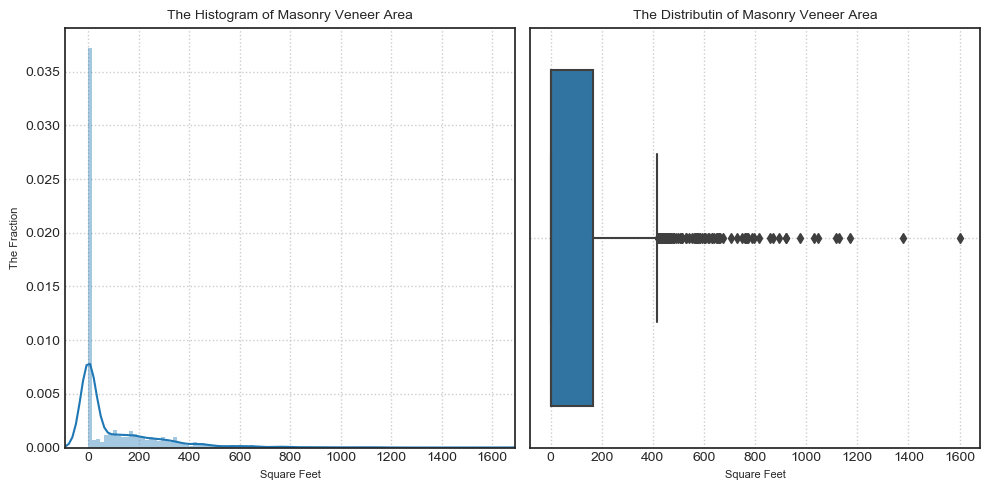

In [148]:
fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
sns.distplot(used_data.MasVnrArea,bins=100)
plt.title('The Histogram of Masonry Veneer Area',fontsize=10)
plt.xlabel('Square Feet',fontsize=8)
plt.ylabel('The Fraction',fontsize=8)
plt.grid(which='major',linestyle=':',linewidth=1)
plt.autoscale(enable=True,axis='x',tight=True)
fig.add_subplot(1,2,2)
sns.boxplot(used_data.MasVnrArea)
plt.title('The Distributin of Masonry Veneer Area',fontsize=10)
plt.xlabel('Square Feet',fontsize=8)
plt.grid(which='major',linestyle=':',linewidth=1)
plt.tight_layout()

In [151]:
used_data.MasVnrType.head()
#used_data[['MasVnrType']]=used_data[['MasVnrType']].fillna('NoMasVen')
used_data.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [153]:
used_data[['Electrical']]=used_data[['Electrical']].fillna('Other')
used_data.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'Other'], dtype=object)

#### Re-recking the missing data

In [176]:
# computing the number of missing data
num_misdata=used_data.iloc[:,1:81].isnull().sum().sort_values(ascending=True)
# computing the fraction of missing data
frac_misdata=(used_data.iloc[:,1:81].isnull().sum()/used_data.isnull().count()).sort_values(ascending=True)
# combing thest two pandas frame into one.
upd_missing_data=pd.concat([num_misdata,frac_misdata],axis=1,keys=['Total','Fraction'])
upd_missing_data.head(10)
missing_data.to_excel("updated_missing_data_all.xls") 

C:\Users\Thilo  Kroeger\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


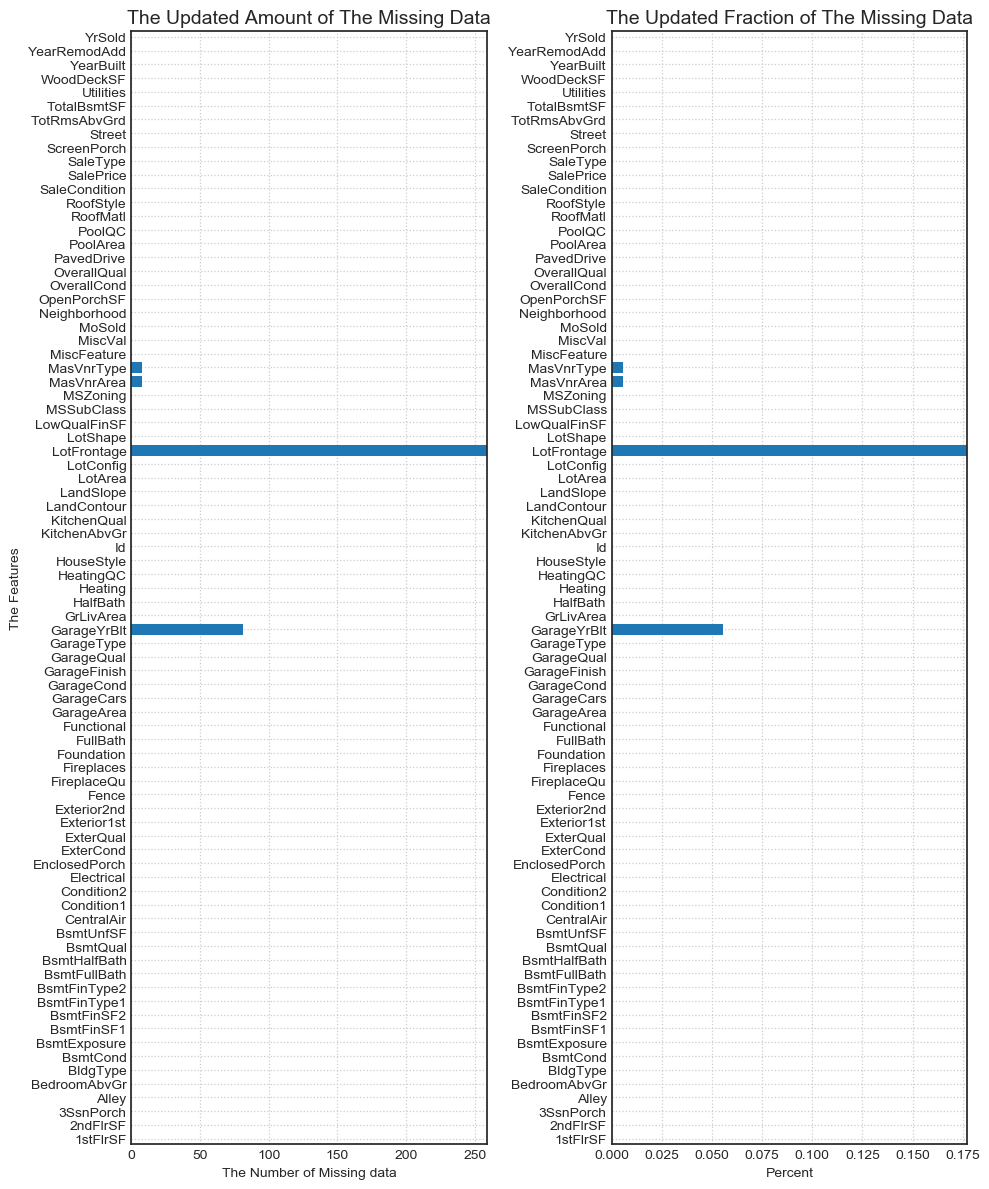

In [179]:
fig=plt.figure(figsize=(10,12))
#fig.suptitle('The Missing Data', fontsize=16)
fig.add_subplot(1,2,1)
plt.barh(upd_missing_data.index,upd_missing_data.Total)#.sort_values(ascending=True))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('The Updated Amount of The Missing Data',fontsize=14)
plt.ylabel('The Features',fontsize=10)
plt.xlabel('The Number of Missing data', fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=0.9)
fig.add_subplot(1,2,2)
plt.barh(upd_missing_data.index,upd_missing_data.Fraction)#.sort_values(ascending=True))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('The Updated Fraction of The Missing Data',fontsize=14)
#plt.ylabel('The Features',fontsize=10)
plt.xlabel('Percent', fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=0.9)
plt.tight_layout()
plt.savefig("Updated_Missing_data.pdf")

### 2.2. Collinear Features

In [183]:
used_data_dum=pd.get_dummies(used_data.iloc[:,1:81])

In [184]:
used_data.shape

(1460, 81)

In [185]:
used_data_dum.shape

(1460, 304)

In [186]:
corr = used_data_dum.corr()

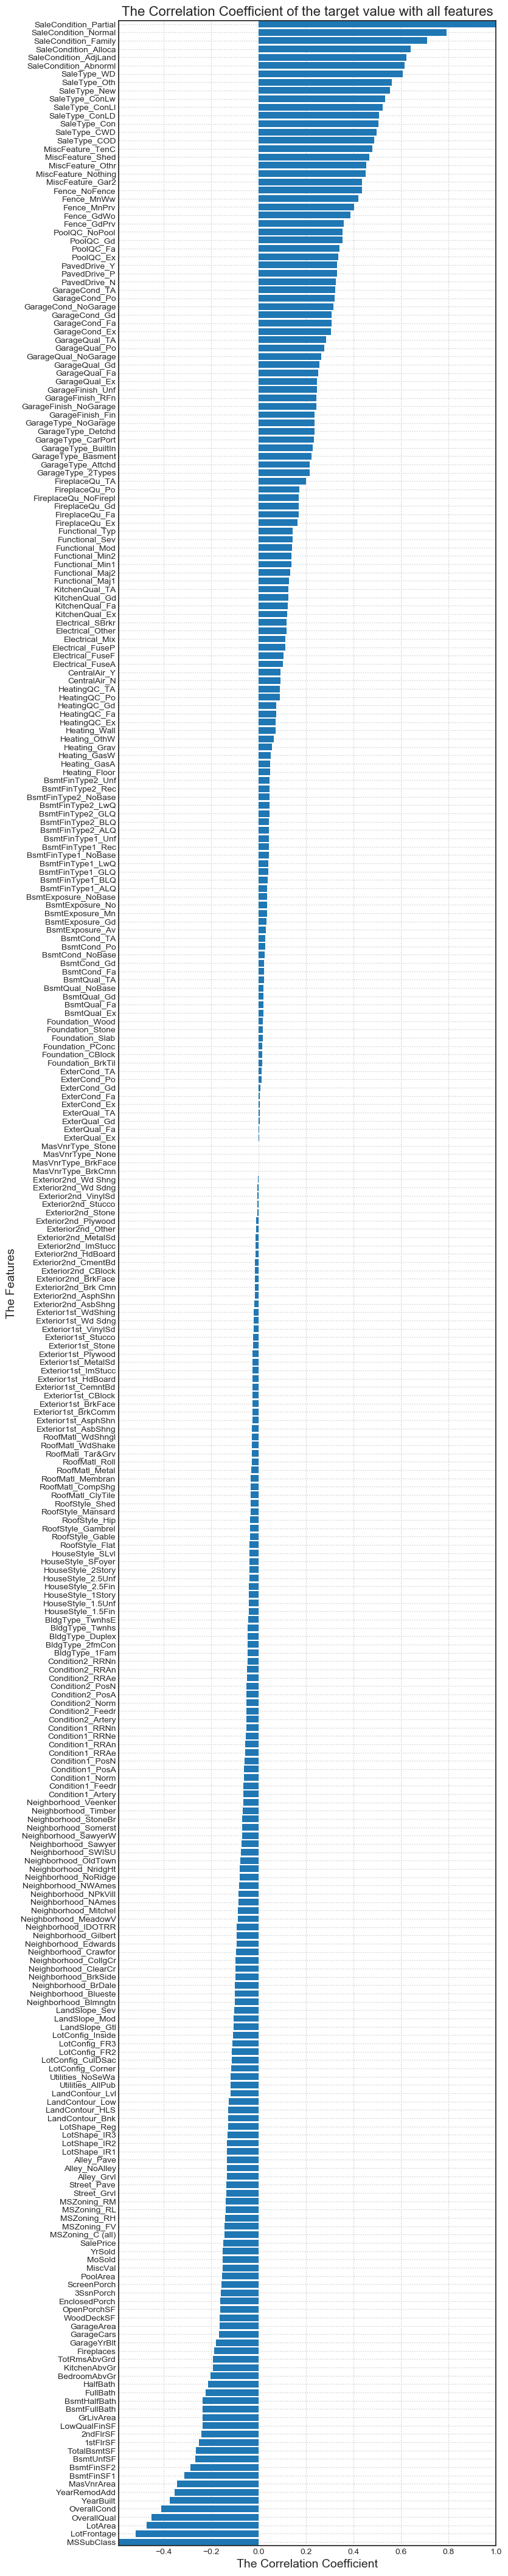

In [187]:
plt.figure(figsize=(8,55))
plt.barh(corr.SalePrice.index, corr.SalePrice.sort_values(ascending=True))
plt.autoscale(enable=True,axis='both',tight=True)
plt.title('The Correlation Coefficient of the target value with all features',fontsize=16)
plt.xlabel('The Correlation Coefficient',fontsize=14)
plt.ylabel('The Features',fontsize=14)
plt.grid(which='major',linestyle=':',linewidth=1)
plt.savefig("CorreWithTarget.pdf")

#### Correlation among features only

In [189]:
corr1=corr.drop('SalePrice',axis=1)

In [190]:
corr1=corr1.drop('SalePrice',axis=0)
corr1.shape

(303, 303)

Text(0.5, 1.0, 'The Correlation Coeffecients among the features only')

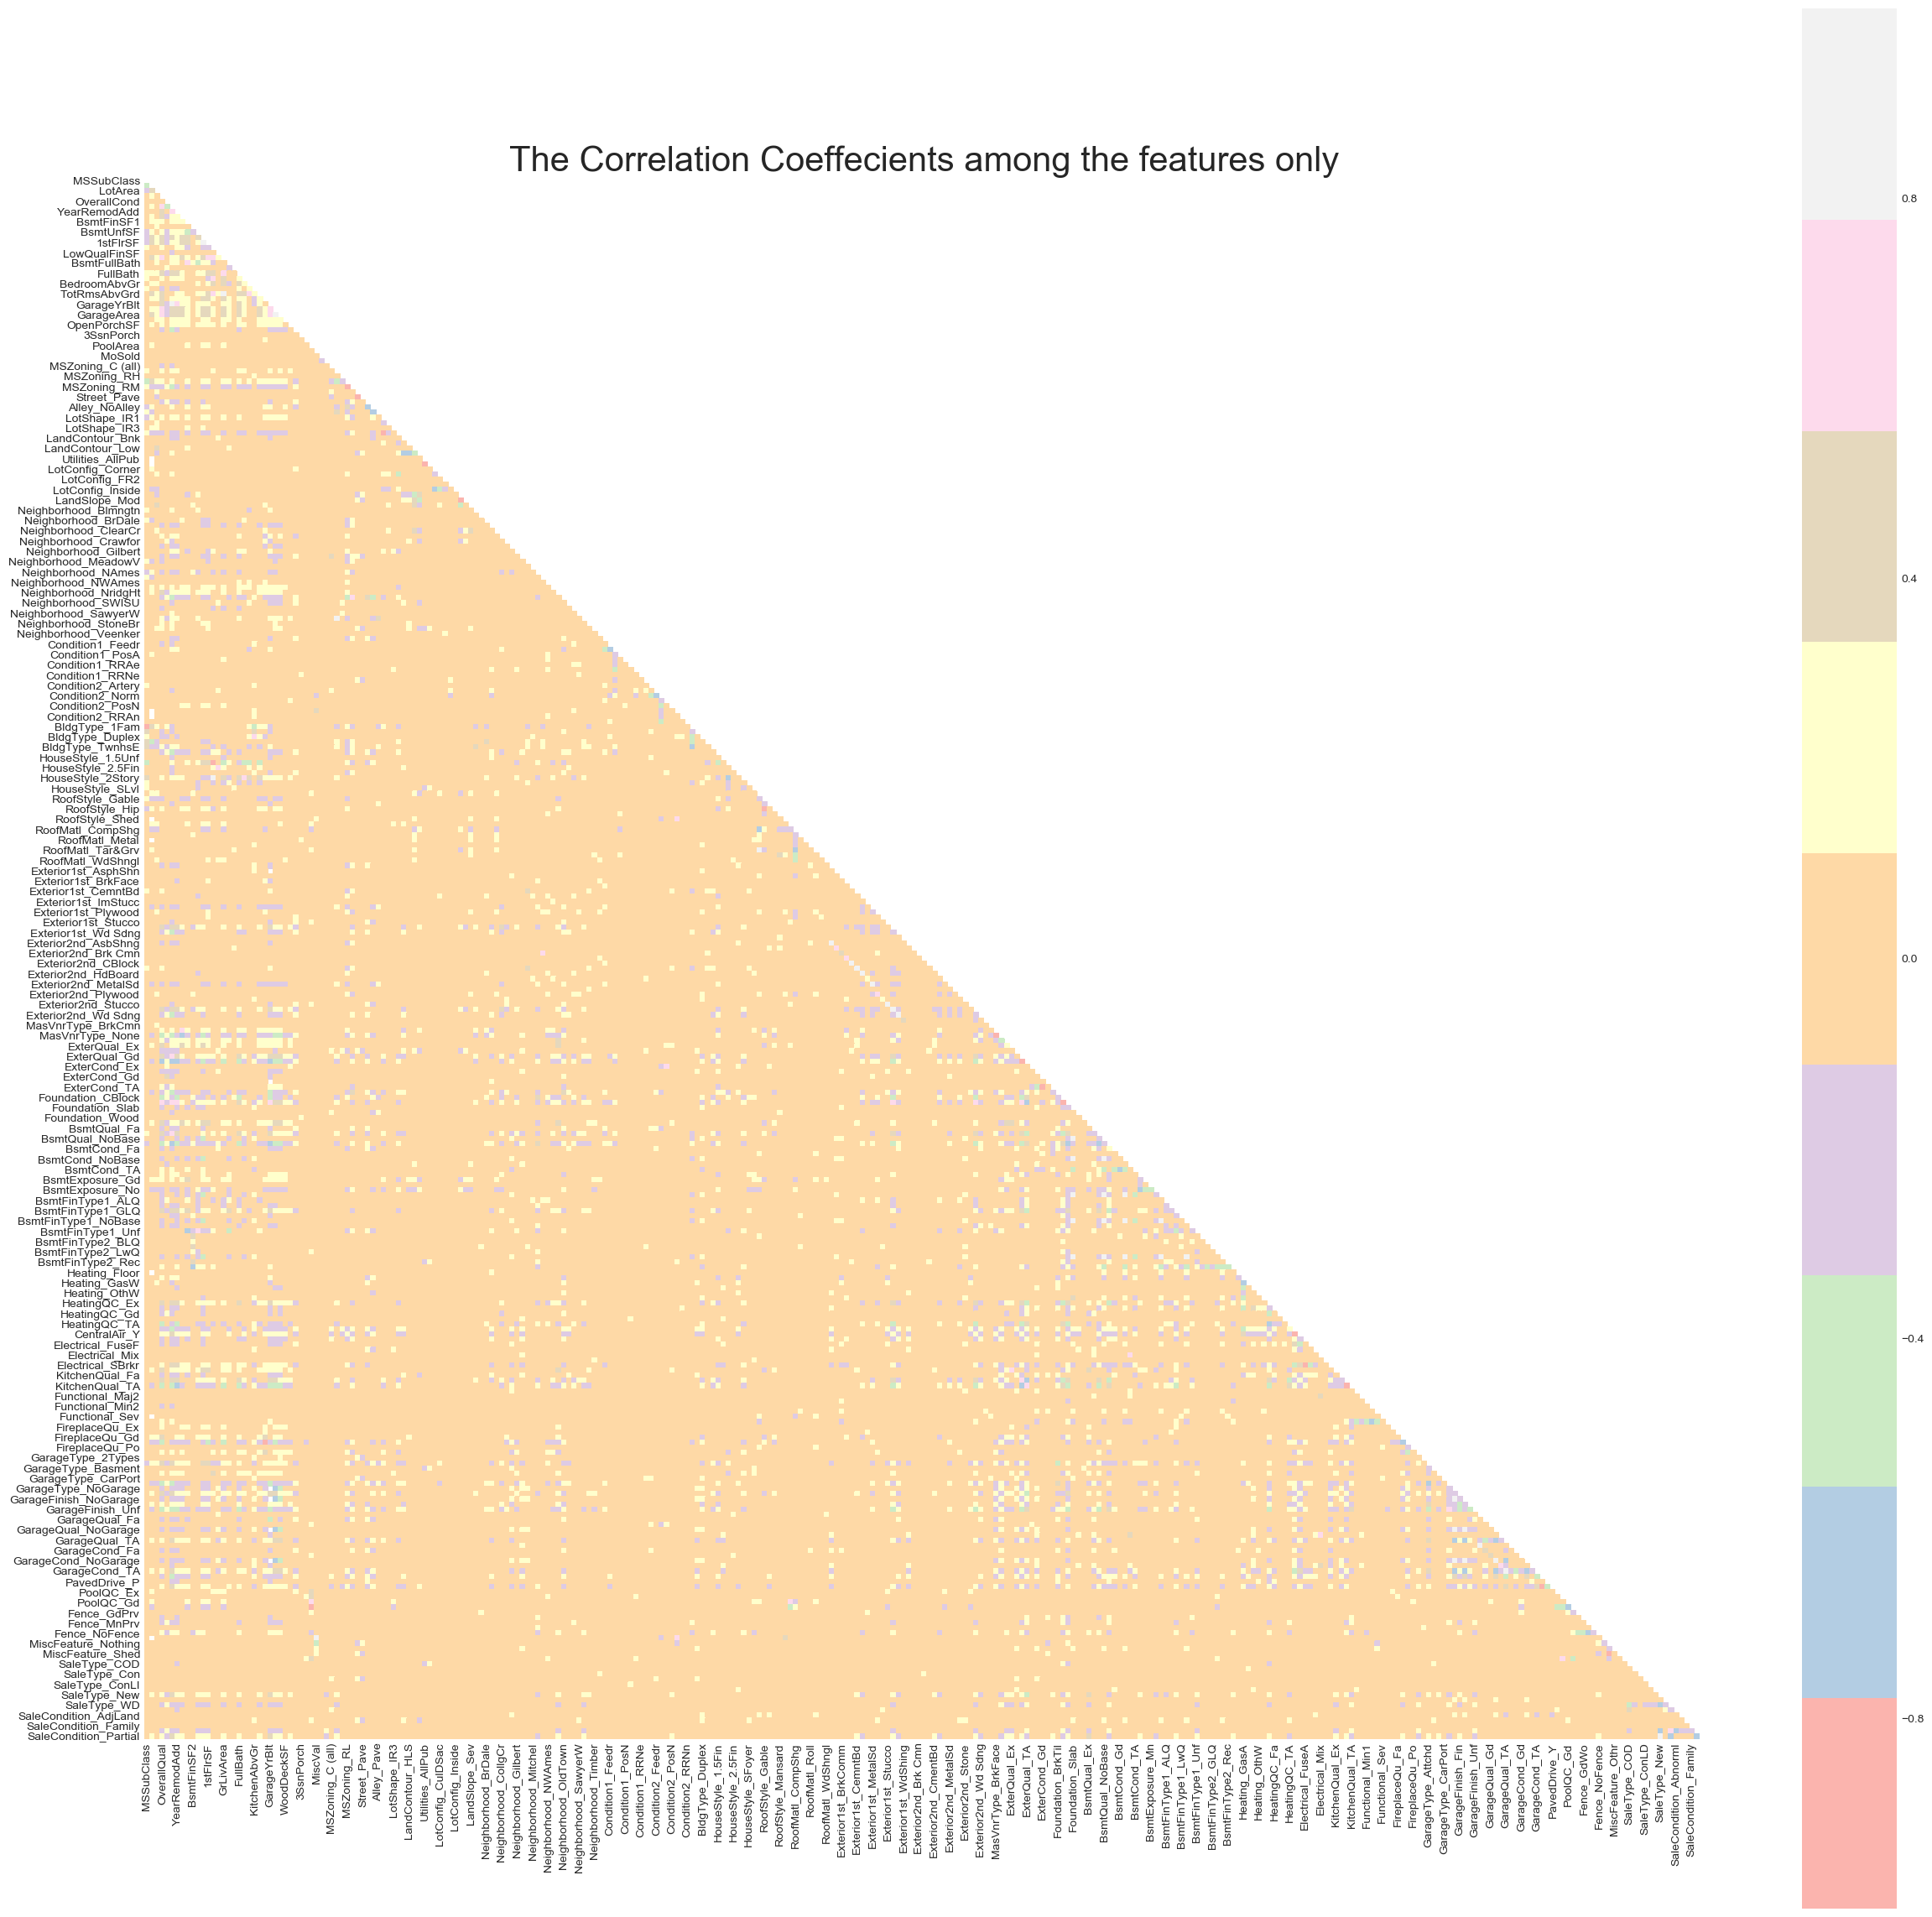

In [198]:
mask1 = np.zeros_like(corr1, dtype=np.bool)
mask1[np.triu_indices_from(mask1)] = True
plt.subplots(figsize=(30, 30))# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1,cmap='Pastel1', mask=mask1,square=True)
plt.title('The Correlation Coeffecients among the features only',fontsize=30)

### Another Way to compute the correlation

In [204]:
fs=FeatureSelector(data=used_data.iloc[:,1:80],labels=used_data.iloc[:,80])

In [205]:
print(Bold+ Red +Underline+'The number of variables has high correlation:\n'+End)
fs.identify_collinear(correlation_threshold=0.47)

The number of variables has high correlation:

14 features with a correlation magnitude greater than 0.47.



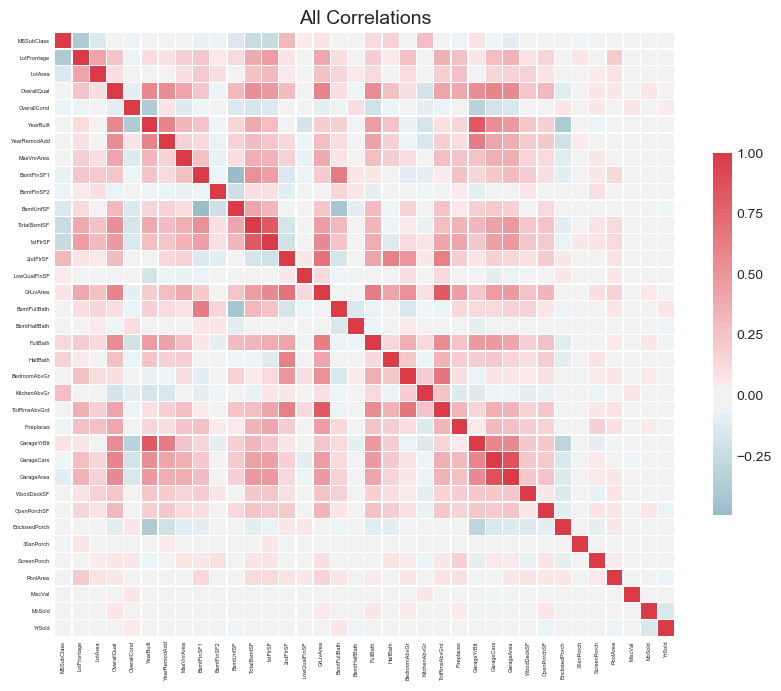

In [206]:
fs.plot_collinear(plot_all=True)

In [207]:
print(Bold+ Red +Underline+'The list of variables has high correlation:\n'+End,fs.ops['collinear'])

The list of variables has high correlation:
 ['YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea']


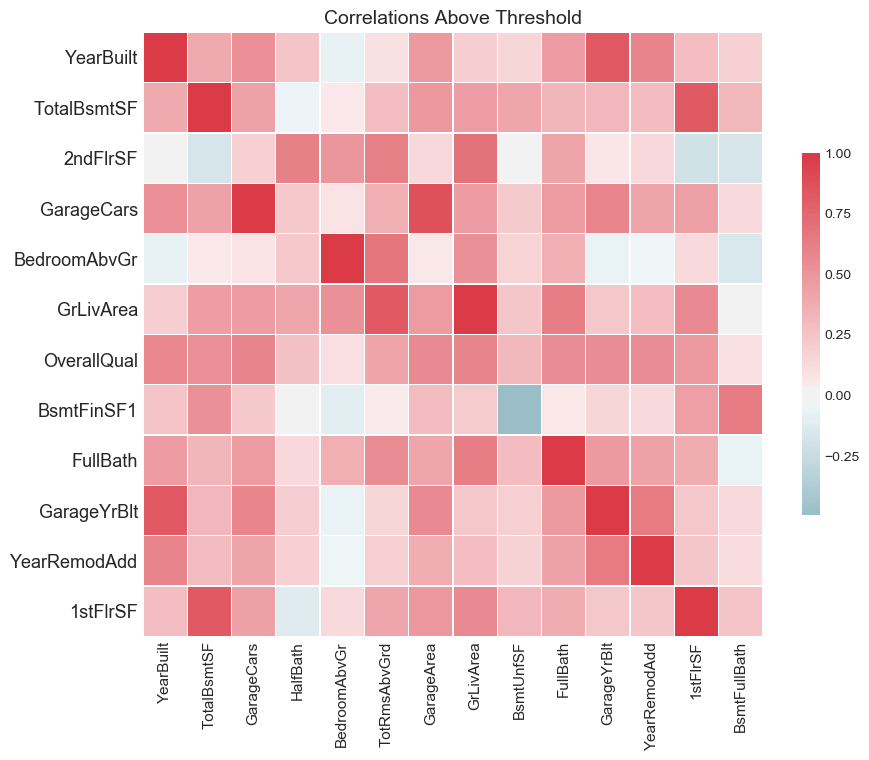

In [208]:
fs.plot_collinear()

In [212]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,YearBuilt,OverallQual,0.572323
1,YearRemodAdd,OverallQual,0.550684
2,YearRemodAdd,YearBuilt,0.592855
3,BsmtUnfSF,BsmtFinSF1,-0.495251
4,TotalBsmtSF,OverallQual,0.537808
5,TotalBsmtSF,BsmtFinSF1,0.522396
6,1stFlrSF,OverallQual,0.476224
7,1stFlrSF,TotalBsmtSF,0.819530
8,GrLivArea,OverallQual,0.593007
9,GrLivArea,1stFlrSF,0.566024


### 2.3. Zero Importance Features

In [ ]:
fs.identify_zero_importance(task='regression', eval_metric='auc',
                            n_iterations=10,
                           early_stopping=True)

In [ ]:
fs.plot_feature_importances(threshold=0.99,plot_n=31)

### 2.4. Low Importance Features

In [ ]:
print(Bold + Blue+'The Number of Features with Low Importance:' + End)
fs.identify_low_importance(cumulative_importance=0.99)

In [ ]:
fs.feature_importances.head(32)

### 2.5. Single Unique Value Features

In [ ]:
print(Bold +Red + Underline+ 'The Number of Features with a Single Unique Value:'+ End)
fs.identify_single_unique()

In [ ]:
fs.plot_unique()

In [ ]:
fs=FeatureSelector(data=used_data.iloc[:,1:80],labels=used_data.iloc[:,80])

In [ ]:
used_data.shape

In [ ]:
thu_dum=pd.get_dummies(used_data)
thu_dum.shape

In [ ]:
y=used_data.iloc[:,80]

In [ ]:
X=used_data.iloc[:,1:80]

In [ ]:
totalmisX = X.isnull().sum().sort_values(ascending=False)
totalmisX.head(5)

In [ ]:
plt.figure(figsize=(13,5))
plt.xticks(rotation='90')
plt.barh(totalmisX.index,totalmisX.sort_values(ascending=True))
plt.autoscale(enable=True,axis='both',tight=True)


In [ ]:
X=X.fillna(0)

In [ ]:
fsX=FeatureSelector(data=X,labels=used_data.iloc[:,80])

In [ ]:
fsX.identify_missing(missing_threshold=0.01)

In [ ]:
fsX.plot_missing()

In [ ]:
X.shape

In [ ]:
X=pd.get_dummies(X)

In [ ]:
X.shape

In [ ]:
print(Bold+ Green +'The Statistical Report of the House Sale Price in Boston:\n'+End, stats.describe(y))
print(Bold+ Green+"The Median Value:"+ End,np.median(y))
print(Bold+ Green+"Q1 quantile: "+ End, np.quantile(y, .25)) 
print(Bold+ Green+ "Q2 quantile: "+ End, np.quantile(y, .50)) 
print(Bold+ Green+"Q3 quantile: "+ End, np.quantile(y, .75)) 
#print(Bold+ Green+"Interquantile Range: "+ np.quantile(y, .75) -End, np.quantile(y, .25)) 

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(y,bins=200)
plt.title('The Distribution of the House Sale Prices in  Boston',fontsize=14)
plt.xlabel('In the US Dollars',fontsize=12)
plt.grid(which='both',linestyle=':',linewidth=1)
plt.minorticks_on()

In [ ]:
plt.figure(figsize=(7,4))
plt.boxplot(y,vert=0)
plt.title('Box and Whishker Plots of the House Sale Price',fontsize=14)
plt.xlabel('In The US Dollars')
plt.grid(which='both',linestyle=':')
plt.minorticks_on()

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [ ]:
xgbr_model=XGBRegressor()

In [ ]:
result_xgbr=xgbr_model.fit(X_train,y_train)

In [ ]:
y_predict_testdat=result_xgbr.predict(X_test)

In [ ]:
print(Bold + Red+ 'The accuracy score of the XGBR with the test data:{:.4f}'.format(mean_squared_error(y_test,y_predict_testdat)))

In [ ]:
mean_squared_error(y_test,y_predict_testdat)

In [ ]:
models=[]
models.append(('LRE', LinearRegression()))
models.append(('LAS', Lasso()))
models.append(('ELA', ElasticNet()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('XGBr', XGBRegressor()))
#models.append(('',))
#models.append(('',))
#models.append(('',))
#models.append(('',))

In [ ]:
results=[]
names=[]
for name, model in models:
    kfold=KFold(n_splits=70,random_state=7)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,n_jobs=10,scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)"
    print(msg)

In [ ]:
results=[]
names=[]
print(Bold + Green+ '\n The Spot Check Result of 11 Competed Models \n'.center(135,'-')+End)
for name, model in models:
    kFold=KFold(n_splits=70, random_state=7)
    cv_results=cross_val_score(model, X_train,y_train,cv=kFold,n_jobs=10,scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)
print(Bold+ Green +"The End".center(44,'-'))

In [ ]:
fig=plt.figure(figsize=(9,4))
plt.boxplot(results,vert=0,patch_artist=True)
ax=fig.add_subplot(111)
ax.set_yticklabels(names)
plt.title('Box and Whisker Plots for the Regression Algorithm Comparison',fontsize=14)
plt.xlabel('The Scoring Values of Mean Squared Errors')
plt.ylabel('The Ensemble Algorithms')
plt.autoscale(enable=True,axis='both',tight=True)
plt.grid()

In [ ]:
model1s=[]
model1s.append(('LRE', LinearRegression()))
model1s.append(('LAS', Lasso()))
model1s.append(('ELA', ElasticNet()))
#model1s.append(('KNR', KNeighborsRegressor))
#model1s.append(('SVR', SVR))
#model1s.append(('',))
#model1s.append(('',))

In [ ]:
results1=[]
names1=[]
print(Bold + Green+ '\n The Spot Check Result of 11 Competed Models \n'.center(135,'-')+End)
for name1, model1 in model1s:
    kFold=KFold(n_splits=70, random_state=7)
    cv_results1=cross_val_score(model1, X_train,y_train,cv=kFold,n_jobs=10,scoring='neg_mean_squared_error')
    results1.append(cv_results1)
    names1.append(name1)
    msg="%s: %f (%f)" % (name1,cv_results1.mean(),cv_results1.std())
    print(msg)
print(Bold+ Green +"The End".center(44,'-'))